In [ ]:
import random

def place_random_start(grid, goal):
    size = len(grid)
    while True:
        row = random.randint(0, size - 1)
        col = random.randint(0, size - 1)
        if grid[row][col] == 0 and (row, col) != goal:
            return (row, col)

def place_random_goal(grid):
    size = len(grid)
    while True:
        row = random.randint(0, size - 1)
        col = random.randint(0, size - 1)
        if grid[row][col] == 0:
            return (row, col)

def generate_grid_with_obstacles(size, obstacle_percentage=0.2):
    grid = [[0 for _ in range(size)] for _ in range(size)]
    num_obstacles = int(size * size * obstacle_percentage)

    for _ in range(num_obstacles):
        while True:
            row = random.randint(0, size - 1)
            col = random.randint(0, size - 1)
            if grid[row][col] == 0:
                grid[row][col] = 1
                break
    return grid

sizes = [10, 20, 50, 100]
obstacle_percentage = 0.3
grids = [generate_grid_with_obstacles(size, obstacle_percentage) for size in sizes]
goals = [place_random_goal(grids[i]) for i in range(len(grids))]
starts = [place_random_start(grids[i], goals[i]) for i in range(len(grids))]

print(starts)
print(goals)

[(3, 4), (10, 2), (5, 30), (56, 89)]
[(1, 3), (4, 18), (23, 2), (59, 48)]


In [ ]:
import math
import heapq
import time
import tracemalloc

class Cell:
    def __init__(self):
        self.parent_i = 0
        self.parent_j = 0
        self.f = float('inf')
        self.g = float('inf')
        self.h = 0

def is_unblocked(grid, row, col):
    return grid[row][col] == 0

def is_destination(row, col, dest):
    return row == dest[0] and col == dest[1]

def calculate_h_value(row, col, dest):
    return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

def trace_path(cell_details, dest):
    print("The Path is ")
    path = []
    row = dest[0]
    col = dest[1]

    while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
        path.append((row, col))
        temp_row = cell_details[row][col].parent_i
        temp_col = cell_details[row][col].parent_j
        row = temp_row
        col = temp_col

    path.append((row, col))
    path.reverse()

    for i in path:
        print("->", i, end=" ")
    print()

def a_star_search(grid, src, dest, size):
    if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
        print("Source or the destination is blocked")
        return

    if is_destination(src[0], src[1], dest):
        print("We are already at the destination")
        return

    closed_list = [[False for _ in range(size)] for _ in range(size)]
    cell_details = [[Cell() for _ in range(size)] for _ in range(size)]

    i = src[0]
    j = src[1]
    cell_details[i][j].f = 0
    cell_details[i][j].g = 0
    cell_details[i][j].h = 0
    cell_details[i][j].parent_i = i
    cell_details[i][j].parent_j = j

    open_list = []
    heapq.heappush(open_list, (0.0, i, j))

    found_dest = False

    while len(open_list) > 0:
        p = heapq.heappop(open_list)

        i = p[1]
        j = p[2]
        closed_list[i][j] = True

        directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
        for dir in directions:
            new_i = i + dir[0]
            new_j = j + dir[1]

            if is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
                if is_destination(new_i, new_j, dest):
                    cell_details[new_i][new_j].parent_i = i
                    cell_details[new_i][new_j].parent_j = j
                    print("The destination cell is found")
                    trace_path(cell_details, dest)
                    found_dest = True
                    return
                else:
                    g_new = cell_details[i][j].g + 1.0
                    h_new = calculate_h_value(new_i, new_j, dest)
                    f_new = g_new + h_new

                    if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
                        heapq.heappush(open_list, (f_new, new_i, new_j))
                        cell_details[new_i][new_j].f = f_new
                        cell_details[new_i][new_j].g = g_new
                        cell_details[new_i][new_j].h = h_new
                        cell_details[new_i][new_j].parent_i = i
                        cell_details[new_i][new_j].parent_j = j

    if not found_dest:
        print("Failed to find the destination cell")

times = []
mems = []

for i in range(len(sizes)):
  tracemalloc.start()
  start = time.time()
  a_star_search(grids[i], starts[i], goals[i], sizes[i])
  end = time.time()
  times.append(end-start)
  current, peak = tracemalloc.get_traced_memory()
  mems.append(peak / (1024 * 1024))
  tracemalloc.stop()
print(times)
print(mems)

The destination cell is found
The Path is 
-> (3, 4) -> (2, 3) -> (1, 3) 
The destination cell is found
The Path is 
-> (10, 2) -> (10, 3) -> (9, 4) -> (8, 5) -> (7, 6) -> (6, 7) -> (5, 8) -> (4, 9) -> (4, 10) -> (4, 11) -> (4, 12) -> (4, 13) -> (4, 14) -> (4, 15) -> (4, 16) -> (4, 17) -> (4, 18) 
The destination cell is found
The Path is 
-> (5, 30) -> (6, 30) -> (7, 29) -> (7, 28) -> (8, 27) -> (9, 26) -> (10, 25) -> (11, 24) -> (12, 23) -> (13, 22) -> (14, 21) -> (15, 20) -> (16, 19) -> (17, 18) -> (18, 17) -> (18, 16) -> (18, 15) -> (19, 14) -> (20, 13) -> (20, 12) -> (21, 11) -> (21, 10) -> (20, 9) -> (21, 8) -> (22, 7) -> (23, 6) -> (23, 5) -> (23, 4) -> (23, 3) -> (23, 2) 
The destination cell is found
The Path is 
-> (56, 89) -> (56, 88) -> (57, 87) -> (58, 86) -> (59, 85) -> (59, 84) -> (59, 83) -> (59, 82) -> (58, 81) -> (58, 80) -> (58, 79) -> (59, 78) -> (59, 77) -> (59, 76) -> (58, 75) -> (59, 74) -> (59, 73) -> (59, 72) -> (59, 71) -> (60, 70) -> (60, 69) -> (60, 68) -> (

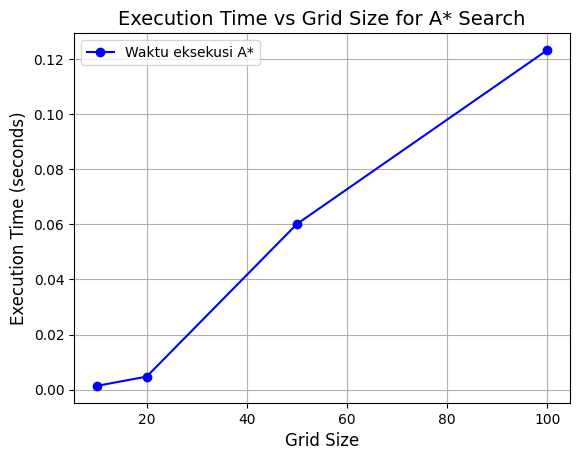

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sizes, times, marker='o', color='b', label='Waktu eksekusi A*')

plt.xlabel('Grid Size', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)

plt.title('Execution Time vs Grid Size for A* Search', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()

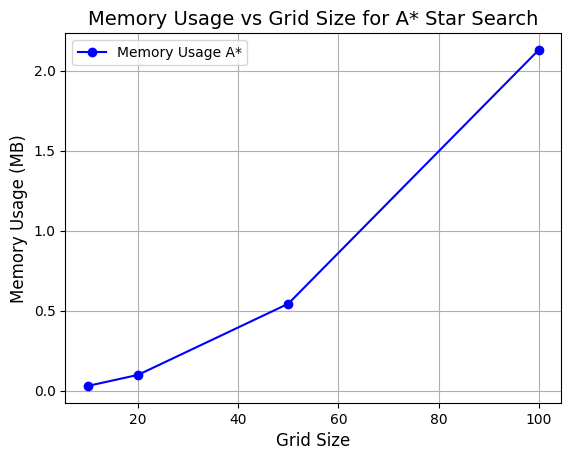

In [ ]:
plt.plot(sizes, mems, marker='o', color='b', label='Memory Usage A*')

plt.xlabel('Grid Size', fontsize=12)
plt.ylabel('Memory Usage (MB)', fontsize=12)

plt.title('Memory Usage vs Grid Size for A* Star Search', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()

In [ ]:
import heapq

def manhattan_heuristic(point, goal):
    return abs(point[0] - goal[0]) + abs(point[1] - goal[1])

def get_neighbors(grid, node):
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for direction in directions:
        neighbor_row = node[0] + direction[0]
        neighbor_col = node[1] + direction[1]
        if 0 <= neighbor_row < len(grid) and 0 <= neighbor_col < len(grid[0]):
            if grid[neighbor_row][neighbor_col] == 0:
                neighbors.append((neighbor_row, neighbor_col))
    return neighbors

def greedy_best_first_search(grid, start, goal):
    open_list = []
    heapq.heappush(open_list, (manhattan_heuristic(start, goal), start))
    came_from = {start: None}
    visited = set()

    while open_list:
        _, current = heapq.heappop(open_list)
        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for neighbor in get_neighbors(grid, current):
            if neighbor not in visited:
                came_from[neighbor] = current
                heapq.heappush(open_list, (manhattan_heuristic(neighbor, goal), neighbor))

    return None

times_greedy = []
mems_greedy = []

for i in range(len(sizes)):
    grid = grids[i]
    start = starts[i]
    goal = goals[i]

    print(f"Grid size: {sizes[i]}x{sizes[i]}")
    print(f"Start: {start}, Goal: {goal}")

    tracemalloc.start()

    start_time = time.time()
    path = greedy_best_first_search(grid, start, goal)
    end_time = time.time()

    times_greedy.append(end_time - start_time)
    current, peak = tracemalloc.get_traced_memory()
    mems_greedy.append(peak / (1024 * 1024))

    if path:
        print(f"Path found: {path}")
    else:
        print("No path found!")

    tracemalloc.stop()

print(times_greedy)
print(mems_greedy)

Grid size: 10x10
Start: (3, 4), Goal: (1, 3)
Path found: [(3, 4), (2, 4), (1, 4), (1, 3)]
Grid size: 20x20
Start: (10, 2), Goal: (4, 18)
Path found: [(10, 2), (9, 2), (8, 2), (8, 1), (7, 1), (6, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (4, 5), (4, 6), (5, 6), (6, 6), (6, 7), (6, 8), (5, 8), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18)]
Grid size: 50x50
Start: (5, 30), Goal: (23, 2)
Path found: [(5, 30), (6, 30), (7, 30), (7, 29), (8, 29), (9, 29), (9, 30), (9, 31), (10, 31), (10, 32), (10, 33), (11, 33), (12, 33), (12, 32), (12, 31), (13, 31), (13, 32), (13, 33), (14, 33), (15, 33), (16, 33), (16, 32), (16, 31), (15, 31), (15, 30), (15, 29), (15, 28), (15, 27), (15, 26), (15, 25), (15, 24), (15, 23), (15, 22), (15, 21), (15, 20), (15, 19), (15, 18), (15, 17), (15, 16), (15, 15), (15, 14), (15, 13), (15, 12), (15, 11), (16, 11), (16, 10), (16, 9), (16, 8), (17, 8), (17, 7), (18, 7), (18, 6), (18, 5), (18, 4), (18, 3), (19, 3), (20, 3

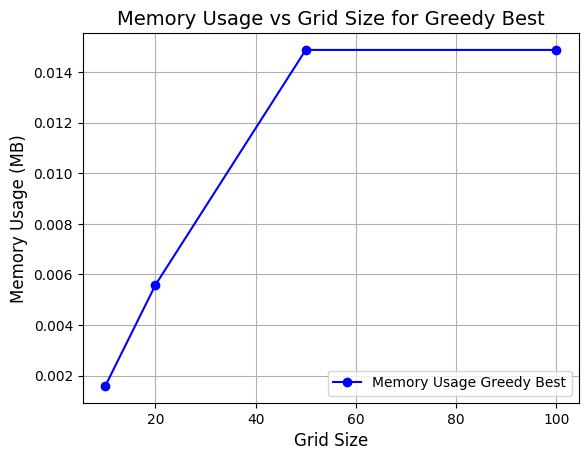

In [ ]:
plt.plot(sizes, mems_greedy, marker='o', color='b', label='Memory Usage Greedy Best')

plt.xlabel('Grid Size', fontsize=12)
plt.ylabel('Memory Usage (MB)', fontsize=12)

plt.title('Memory Usage vs Grid Size for Greedy Best', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()

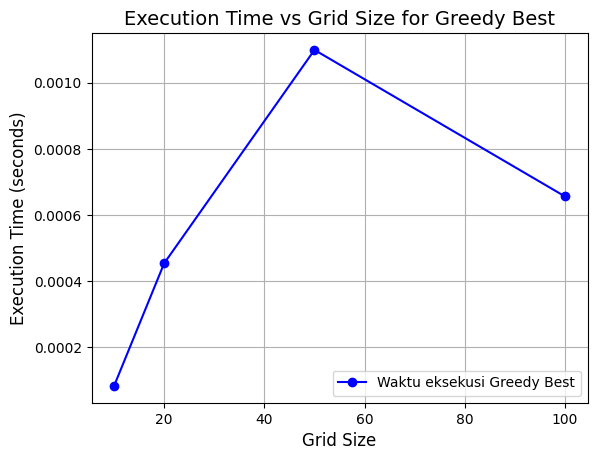

In [ ]:
plt.plot(sizes, times_greedy, marker='o', color='b', label='Waktu eksekusi Greedy Best')

plt.xlabel('Grid Size', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)

plt.title('Execution Time vs Grid Size for Greedy Best', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()

[0.02908039093017578, 0.09785652160644531, 0.5427398681640625, 2.129439353942871]
[0.00159454345703125, 0.005584716796875, 0.0148773193359375, 0.0148773193359375]


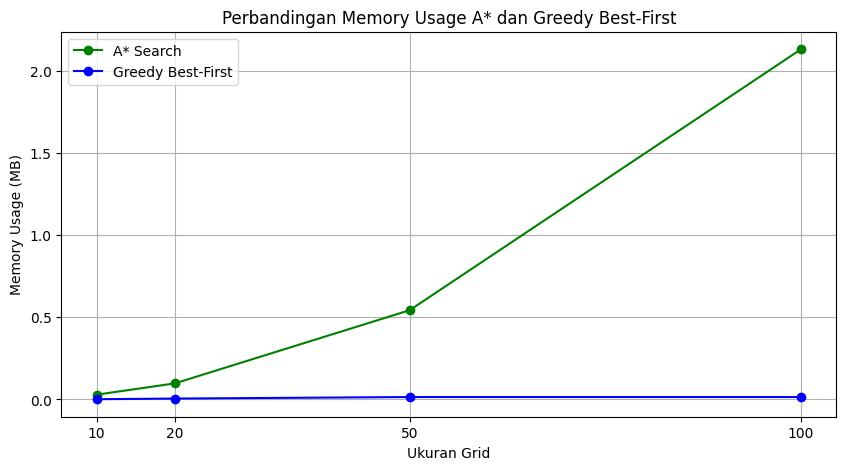

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(sizes, mems, marker='o', label='A* Search', color='g')
plt.plot(sizes, mems_greedy, marker='o', label='Greedy Best-First', color='b')

print(mems)
print(mems_greedy)

plt.xlabel('Ukuran Grid')
plt.ylabel('Memory Usage (MB)')
plt.title('Perbandingan Memory Usage A* dan Greedy Best-First')
plt.xticks(sizes)
plt.legend()
plt.grid(True)

plt.show()


[0.0013523101806640625, 0.004730701446533203, 0.06010890007019043, 0.12326288223266602]
[8.296966552734375e-05, 0.000453948974609375, 0.0010993480682373047, 0.0006561279296875]


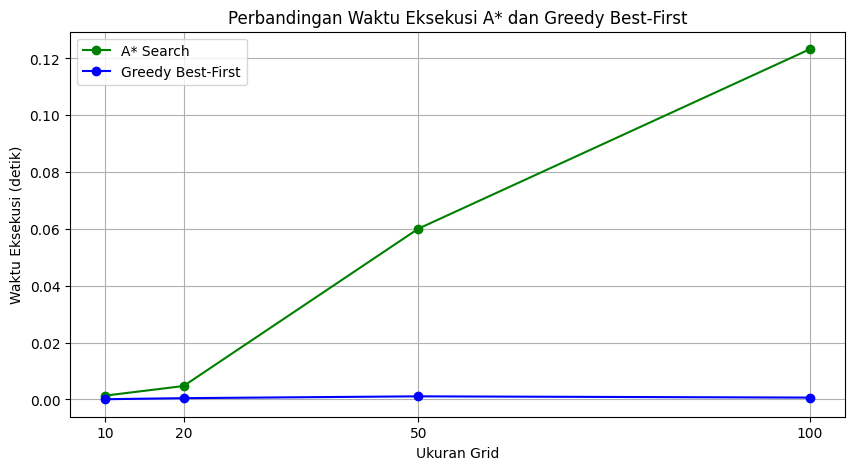

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(sizes, times, marker='o', label='A* Search', color='g')
plt.plot(sizes, times_greedy, marker='o', label='Greedy Best-First', color='b')
plt.xlabel('Ukuran Grid')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi A* dan Greedy Best-First')
plt.xticks(sizes)
plt.legend()
plt.grid(True)

print(times)
print(times_greedy)
plt.show()